In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

from config.model_config import ModelConfig
from config.experiment_config import ExperimentConfig, AvailableDatasets
from vol_predict.features.preprocessor import OneToOnePreprocessor
from vol_predict.loss.loss import Loss

from vol_predict.models.dl.lstm_softplus_predictor import LSTMSoftplusPredictor as Model
from vol_predict.models.dl.lstm_square_predictor import LSTMSquarePredictor as Baseline

from run import initialize_runner, run_backtest

In [3]:
config = ExperimentConfig()
config.DATASET = AvailableDatasets.BITCOIN

model_params = ModelConfig()
baseline_params = ModelConfig()

model_params.n_features = 1200
model_params.n_unique_features = 10

# Handles the features
feature_processor = OneToOnePreprocessor()

runner = initialize_runner(
    model_config=model_params,
    preprocessor=feature_processor,
    experiment_config=config,
)

Train data on 2018-06-05 00:00:00 to 2018-08-31 22:00:00
Test data on 2018-09-15 01:00:00 to 2018-09-30 21:00:00
Num Train Iterations: 1939
Num Features: 1212


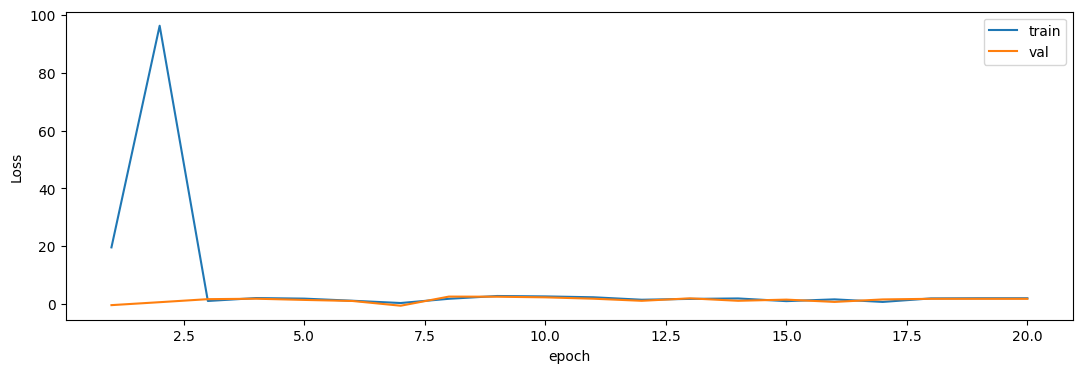

In [4]:
runner.model_config.lr = 1e-2
runner.model_config.n_epochs = 20
runner.model_config.hidden_size = 32
runner.model_config.n_layers = 3
runner.model_config.batch_size = 16
runner.model_config.optimizer = torch.optim.Adam
runner.model_config.loss = Loss.NLL

result = run_backtest(
    model_cls=Model,
    baseline_cls=Baseline,
    runner=runner,
)

In [5]:
# LR_GRID = [0.01, 0.001, 1e-6]
#
# rmse_grid = []
# for lr in LR_GRID:
#     model_params.learning_rate = lr
#     result = run_backtest(
#         model_cls=Model,
#         baseline_cls=Baseline,
#         runner=runner,
#     )
#     rmse_grid.append(result.model_result.ml_metrics["RMSEVolLoss"])
#     rmse_grid.append(result.baseline_result.ml_metrics["RMSEVolLoss"])

In [6]:
result.model_result

AssessmentResult:
* mean_model_loss = -9.109236
* mean_val_loss = -9.109236
* mean_pred_vol = 0.009438686072826385
* mean_true_vol = 0.008140272460877895
* RMSEVolLoss = 0.000124963961

In [7]:
result.baseline_result

AssessmentResult:
* mean_model_loss = 1.807464
* mean_val_loss = 1.807464
* mean_pred_vol = 3.214258909225464
* mean_true_vol = 0.008140272460877895
* RMSEVolLoss = 14.672112464905

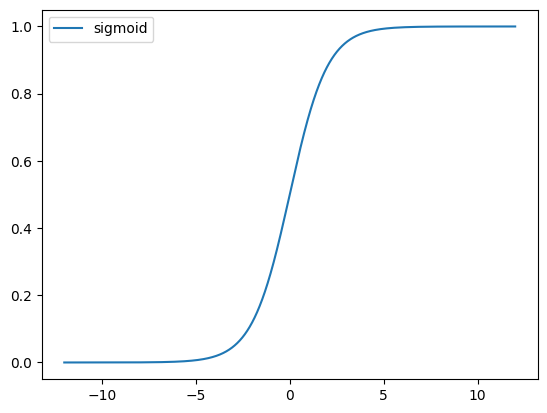

In [41]:
import matplotlib.pyplot as plt

x = torch.linspace(-12, 12, 100_000)
sigmoid_tensor = torch.nn.Sigmoid()(x)

plt.plot(x, sigmoid_tensor, label="sigmoid")
plt.legend()
plt.show()

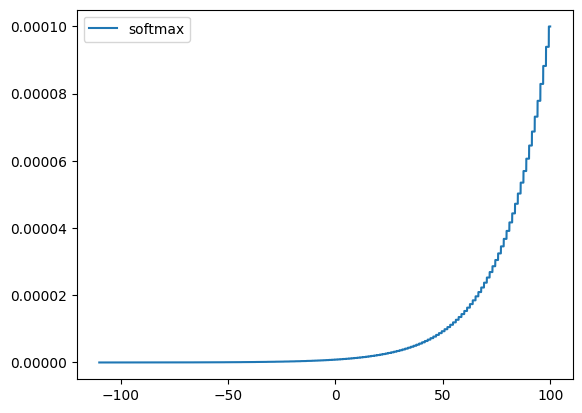

In [58]:
START = 100

x_softmax = torch.linspace(-10 - START, START, 100_000)
tensor_softmax = torch.stack([x, x_softmax], dim=1)
softmax_tensor = torch.nn.Softmax(dim=0)(tensor_softmax)

plt.plot(x_softmax, softmax_tensor[:, 0], label="softmax")
plt.legend()
plt.show()

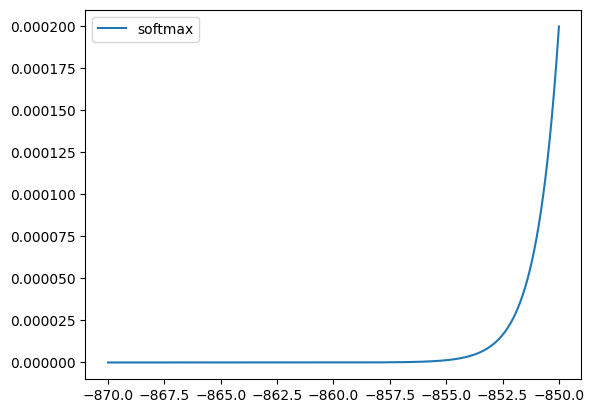

In [49]:
,x = torch.linspace(-870, -850, 100_000)
softmax_tensor = torch.nn.Softmax(dim=0)(x)

plt.plot(x, softmax_tensor, label="softmax")
plt.legend()
plt.show()